# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


Overview:

Imagine we are entering a drawing competition where the goal is to draw something amazing from scratch. Before the competition we train ourselves by looking at famous art, and observing the lines. To practice, we take a Monet, and then start to draw it ourselves, exclusively using arrows, trying to follow the lines. Then we compare our work to Monet's, with the goal that all our little arrows match his lines. Over time, the more we practice, the closer we can get out mental model to be like Monet's, and the better we will do in the art competition. This program is designed to do the process for us - to look at data, make some guesses of where the arrows should be, and create a model to use in the future.

To do this, we have one piece of paper we use as the answer key, and the other we write our guesses on. On our answer key, we have Monet's starry night. It's a beauty. So we go over to our guesses page and start drawing arrows wildly - at random almost! Then after a time we go back to our answer key and compare the two. We carefully add up the lengths of each arrow and compare. We erase some of the arrows on the guess paper and re-write them as we learn more. We group arrows together, starting with basic outlines and shapes, then filling in more complex features. Slowly, over time, we update our mental model for what each grouping of arrows should look like. Eventually we feel confident that, if given a fresh sheet of paper, by following our mental model of the groups of arrows, we could systematically make it look like the answer key. This mental knowledge we have gained is the machine's trained model. The arrows are vectors. Groups of arrows are matrices. In essence we are using the groups of arrows to detect patterns in the information.

This project has been quite interesting. This is a learning project, some code was provided by Udacity, some of the models are well known (ie LeNet, Dropout, etc.), and there a few functions from the forums. I have tried to be clear when there was obvious attribution. Enjoy! :)



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


print("Complete")

Complete


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.


Complete the basic data summary below.

In [2]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape is", image_shape)
print("Number of classes =", n_classes)
print(np.unique(y_train))
print("Complete")

Number of training examples = 39209
Number of testing examples = 12630
Image data shape is (32, 32, 3)
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Complete


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

41
Complete


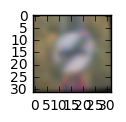

In [25]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(1, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
print("Complete")


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
# Credit for this function to:
# https://carnd-forums.udacity.com/questions/10322627/project-2-unbalanced-data-generating-additional-data-by-jittering-the-original-image

# After my own research shown here:
# https://carnd-forums.udacity.com/questions/36049206/how-to-scale-zoom-images-p2-traffic-sign

import cv2

def transform_image(img,ang_range,shear_range,trans_range):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over. 
    
    A Random uniform distribution is used to generate different parameters for transformation
    
    '''
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

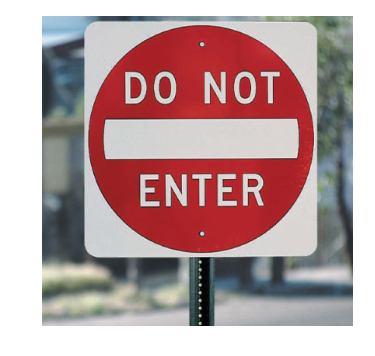

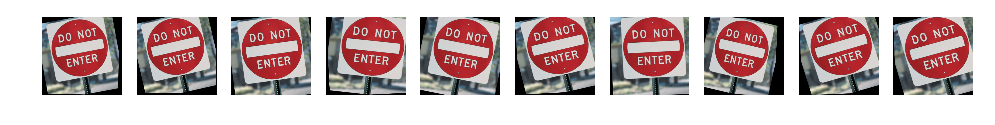

In [5]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

image = mpimg.imread('extra-images/2.jpg')
plt.imshow(image);
plt.axis('off');
plt.show()


gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 
plt.figure(figsize=(12,12))
for i in range(10):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = transform_image(image,30,2,3)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()



Generating additional features.
127589
Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (20km/h)
Current label id:  0
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


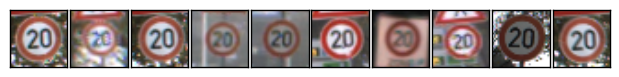

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (30km/h)
Current label id:  1
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


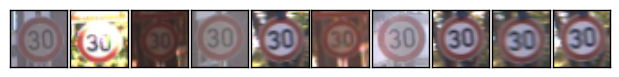

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (50km/h)
Current label id:  2
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


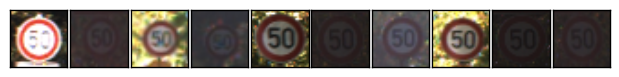

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (60km/h)
Current label id:  3
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


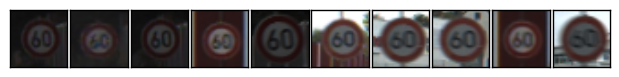

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (70km/h)
Current label id:  4
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


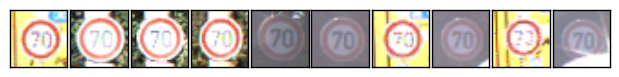

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (80km/h)
Current label id:  5
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


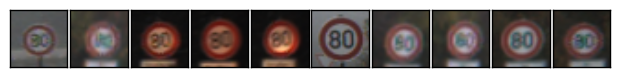

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  End of speed limit (80km/h)
Current label id:  6
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


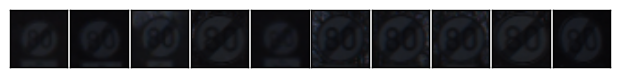

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (100km/h)
Current label id:  7
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


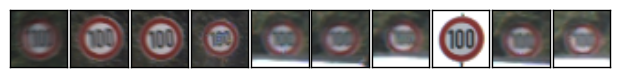

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Speed limit (120km/h)
Current label id:  8
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


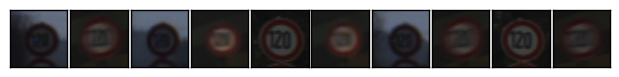

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  No passing
Current label id:  9
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


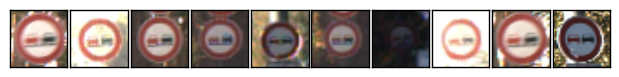

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  No passing for vehicles over 3.5 metric tons
Current label id:  10
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


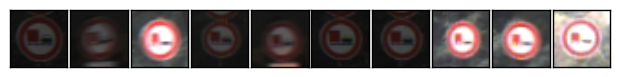

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Right-of-way at the next intersection
Current label id:  11
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


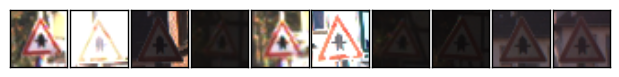

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Priority road
Current label id:  12
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


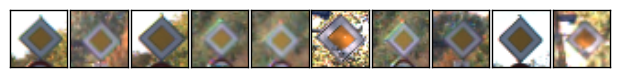

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Yield
Current label id:  13
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


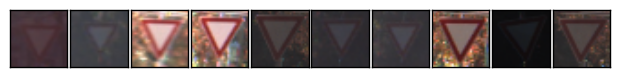

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Stop
Current label id:  14
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


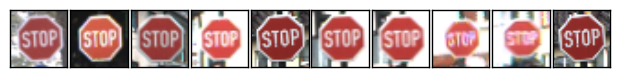

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  No vehicles
Current label id:  15
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


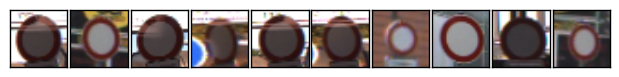

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Vehicles over 3.5 metric tons prohibited
Current label id:  16
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


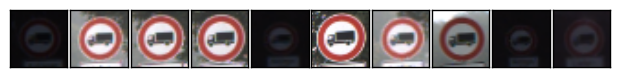

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  No entry
Current label id:  17
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


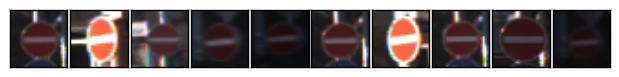

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  General caution
Current label id:  18
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


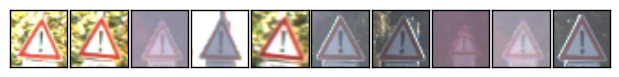

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Dangerous curve to the left
Current label id:  19
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


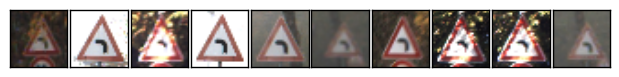

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Dangerous curve to the right
Current label id:  20
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


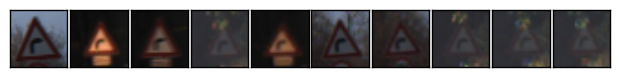

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Double curve
Current label id:  21
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


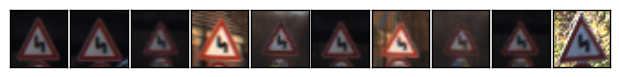

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Bumpy road
Current label id:  22
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


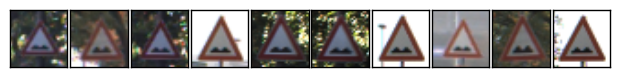

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Slippery road
Current label id:  23
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


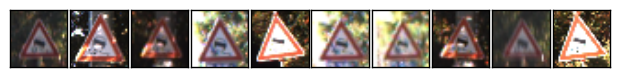

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Road narrows on the right
Current label id:  24
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


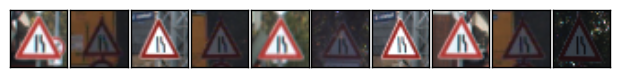

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Road work
Current label id:  25
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


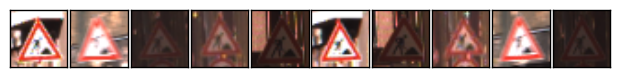

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Traffic signals
Current label id:  26
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


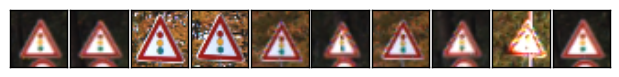

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Pedestrians
Current label id:  27
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


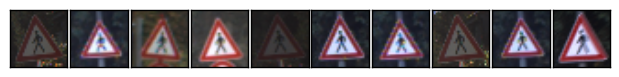

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Children crossing
Current label id:  28
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


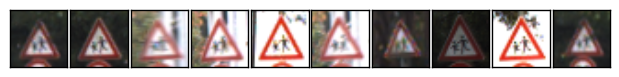

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Bicycles crossing
Current label id:  29
Number of features:  4000
features_to_be_generated:  0
Passing, no images to generate


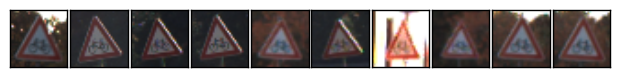

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Beware of ice/snow
Current label id:  30
Number of features:  450
features_to_be_generated:  3550
Generating images for  Beware of ice/snow


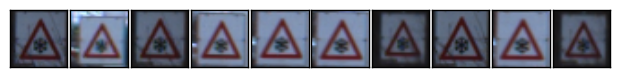

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000  780  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Wild animals crossing
Current label id:  31
Number of features:  780
features_to_be_generated:  3220
Generating images for  Wild animals crossing


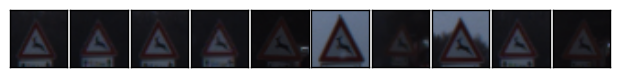

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000  240  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  End of all speed and passing limits
Current label id:  32
Number of features:  240
features_to_be_generated:  3760
Generating images for  End of all speed and passing limits


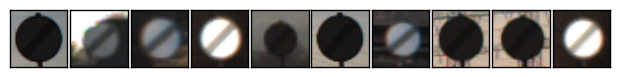

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000  689  420 1200  390  210 2070  300  360  240  240]
Current label name:  Turn right ahead
Current label id:  33
Number of features:  689
features_to_be_generated:  3311
Generating images for  Turn right ahead


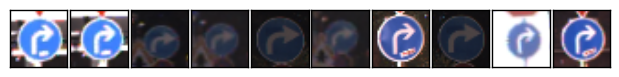

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000  420 1200  390  210 2070  300  360  240  240]
Current label name:  Turn left ahead
Current label id:  34
Number of features:  420
features_to_be_generated:  3580
Generating images for  Turn left ahead


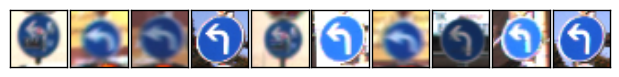

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 1200  390  210 2070  300  360  240  240]
Current label name:  Ahead only
Current label id:  35
Number of features:  1200
features_to_be_generated:  2800
Generating images for  Ahead only


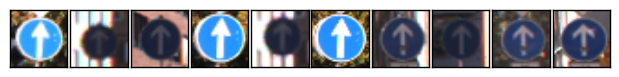

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000  390  210 2070  300  360  240  240]
Current label name:  Go straight or right
Current label id:  36
Number of features:  390
features_to_be_generated:  3610
Generating images for  Go straight or right


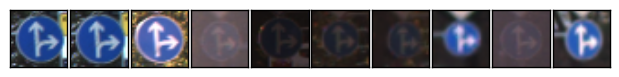

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000  210 2070  300  360  240  240]
Current label name:  Go straight or left
Current label id:  37
Number of features:  210
features_to_be_generated:  3790
Generating images for  Go straight or left


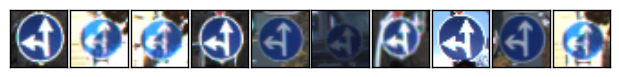

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 2070  300  360  240  240]
Current label name:  Keep right
Current label id:  38
Number of features:  2070
features_to_be_generated:  1930
Generating images for  Keep right


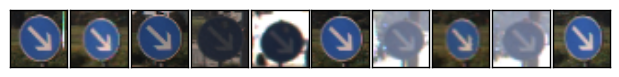

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000  300  360  240  240]
Current label name:  Keep left
Current label id:  39
Number of features:  300
features_to_be_generated:  3700
Generating images for  Keep left


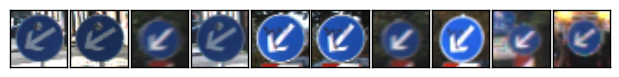

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000  360  240  240]
Current label name:  Roundabout mandatory
Current label id:  40
Number of features:  360
features_to_be_generated:  3640
Generating images for  Roundabout mandatory


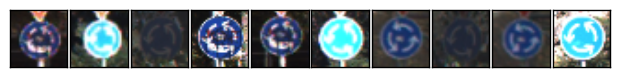

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000  240  240]
Current label name:  End of no passing
Current label id:  41
Number of features:  240
features_to_be_generated:  3760
Generating images for  End of no passing


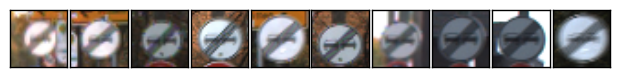

-----------------------------------------------------

Bins [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000  240]
Current label name:  End of no passing by vehicles over 3.5 metric tons
Current label id:  42
Number of features:  240
features_to_be_generated:  3760
Generating images for  End of no passing by vehicles over 3.5 metric tons


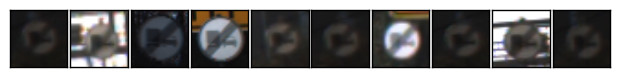

-----------------------------------------------------



In [7]:
"""

This loop looks at each label in the data set and generates images up to the feature_count_goal
specified above.

Loop through:
Labels
--> Features

"""
print("Generating additional features.")


from pandas.io.parsers import read_csv
signnames = read_csv("signnames.csv").values[:, 1]

unique_labels = np.unique(y_train)

goal_number_of_features = 4000
t_1 = 30
t_2 = 2
t_3 = 3

print(len(X_train))
    
for label_id in range(len(unique_labels)):
    
    unique_labels = np.unique(y_train)
    #print(unique_labels)
    
    #Print update to feature tracking.
    print("Bins", np.bincount(y_train))
    print("Current label name: ", signnames[label_id])
    print("Current label id: ", label_id)
    
    #Print feature currently being generate    
    y_labels = np.where(y_train == label_id)
    #print(y_labels)
    
    number_of_features = len(X_train[y_labels])
    print("Number of features: ", number_of_features)
    feature_difference = goal_number_of_features - number_of_features
    if feature_difference > 0:
        features_to_be_generated = feature_difference
    else:
        features_to_be_generated = 0
    print("features_to_be_generated: ", features_to_be_generated)
    
    
    if features_to_be_generated > 0:
        
        print("Generating images for ", signnames[label_id])
        new_features = []
        new_labels = []
        
        while i <= features_to_be_generated:
            for feature in X_train[y_labels]:
                
                #This appears to work.
                if features_to_be_generated == 0: 
                    break
                
                else:
                    #print(y_labels)            
                    #print(feature)

                    # generate image
                    new_image = transform_image(feature,t_1,t_2,t_3)

                    new_features.append(new_image)
                    new_labels.append(label_id)

                    # update number of features
                    #print(len(new_labels))

                    unique_labels = np.unique(y_train)
                    #print(unique_labels)

                    features_to_be_generated = features_to_be_generated - 1
                
        i = i + 1


        # Append image to data
        X_train = np.append(X_train, new_features, axis=0)
        y_train = np.append(y_train, new_labels, axis=0)
        
    else:
        print("Passing, no images to generate")
        
    
    fig = plt.figure(figsize = (6, 1))
    
    x = np.array(y_labels)
    x_min = x.min()
    x_max = x_min + 100
    #print(y_labels)
    #print(x_max)
    
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    random_index = random.sample(range(x_min, x_max), 10)
    
    # this is from http://navoshta.com/traffic-signs-classification/
    
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_index[i]])
    plt.show()

    
    print("-----------------------------------------------------\n")


# TODO Seperate out generated data from original in flow


In [8]:

# Normalize features
print('Normalizing features...')
X_train = X_train / 255. * 0.8 + 0.1

inputs_per_class = np.bincount(y_train)
print(inputs_per_class)

print('Data preprocessed')
n_train = len(X_train)
print("Number of training examples =", n_train)

# store data in a pickle file ?

Normalizing features...
[4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000]
Data preprocessed
Number of training examples = 172000


In [9]:

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print("Complete")

Complete


Split the data

In [10]:
# split into 80% for train and 20% for validation

seed = 15465
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=seed, stratify=y_train)


n_train = len(X_train)
print("Number of training examples =", n_train)

n_validation = len(X_validation)
print("Number of validation examples =", n_validation)
print("Complete")

Number of training examples = 137600
Number of validation examples = 34400
Complete


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer for 1 and 2:**

From reading LeCun's paper on traffic sign recongition he suggested generating additional data, ie by rotating, scaling, and shifting data. I then researched options to do so.

From reading various blog posts I learnt about "binning" data, and have attempted to balance the data set. Finnally there is a feature normalization.

I had been used to using a cross validation set to test the network's performance prior to using the real test data. I researched ways to implmenet a validation set.



In [26]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 64

from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    convolutional_1_weights = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    convolutional_1_bias = tf.Variable(tf.zeros(6)) # set to 6 as output is 6
    convolutional_1 = tf.nn.conv2d(x, convolutional_1_weights, strides=[1,1,1,1], padding='VALID') + convolutional_1_bias
    
    # Activation.
    convolutional_1 = tf.nn.relu(convolutional_1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    # Stride of 2 reduces output by 2
    convolutional_1 = tf.nn.max_pool(convolutional_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    ## END Layer 1
    
    
    # Layer 2: Convolutional. Output = 10x10x16.
    convolutional_2_weights = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    convolutional_2_bias = tf.Variable(tf.zeros(16))
    # pass the first layer
    convolutional_2 = tf.nn.conv2d(convolutional_1, convolutional_2_weights, strides=[1,1,1,1], padding='VALID' ) + convolutional_2_bias
    
    # Activation.
    convolutional_2 = tf.nn.relu(convolutional_2)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    convolutional_2 = tf.nn.max_pool(convolutional_2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # Flatten. Input = 5x5x16. Output = 400.
    fully_connected_0 = flatten(convolutional_2)
    ### End Layer 2
    
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fully_connected_1_weights = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fully_connected_1_bias = tf.Variable(tf.zeros(120))
    fully_connected_1 = tf.matmul(fully_connected_0, fully_connected_1_weights) + fully_connected_1_bias
    
    # Activation.
    fully_connected_1 = tf.nn.relu(fully_connected_1)
    
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    # shape = (input, output)
    fully_connected_2_weights = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fully_connected_2_bias = tf.Variable(tf.zeros(84))
    fully_connected_2 = tf.matmul(fully_connected_1, fully_connected_2_weights) + fully_connected_2_bias
    
    # Activation.
    fully_connected_2 = tf.nn.relu(fully_connected_2)
    
    # drop out
    """
    
    """
    drop_out = tf.nn.dropout(fully_connected_2, keep_prob)
    
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fully_connected_3_weights = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fully_connected_3_bias = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_out, fully_connected_3_weights) + fully_connected_3_bias
        
    return logits

print("Complete")

Complete


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I primarily used the LetNet Architecture. The the main exception is I also added in drop_out as implemented by TensorFlow.



.










In [19]:
### Train your model here.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)


# added this to fix bug CUDA_ERROR_ILLEGAL_ADDRESS / kernal crash
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)
    
rate = 0.00015

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

print("Complete")

Complete


In [20]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

print("Complete")

Complete


In [21]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: .5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, '.\lenet')
    print("Model saved")
    
print("Complete")

Training...

EPOCH 1 ...
Validation Accuracy = 0.592

EPOCH 2 ...
Validation Accuracy = 0.704

EPOCH 3 ...
Validation Accuracy = 0.769

EPOCH 4 ...
Validation Accuracy = 0.793

EPOCH 5 ...
Validation Accuracy = 0.832

EPOCH 6 ...
Validation Accuracy = 0.858

EPOCH 7 ...
Validation Accuracy = 0.878

EPOCH 8 ...
Validation Accuracy = 0.886

EPOCH 9 ...
Validation Accuracy = 0.902

EPOCH 10 ...
Validation Accuracy = 0.906

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.928

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 14 ...
Validation Accuracy = 0.935

EPOCH 15 ...
Validation Accuracy = 0.939

EPOCH 16 ...
Validation Accuracy = 0.945

EPOCH 17 ...
Validation Accuracy = 0.947

EPOCH 18 ...
Validation Accuracy = 0.951

EPOCH 19 ...
Validation Accuracy = 0.954

EPOCH 20 ...
Validation Accuracy = 0.957

EPOCH 21 ...
Validation Accuracy = 0.958

EPOCH 22 ...
Validation Accuracy = 0.959

EPOCH 23 ...
Validation Accuracy = 0.963

EPOCH 24 ...
Validation Accura

## Evaluate the Model

In [22]:

#Test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.930


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the AdamOptimizer from pervious lesson as I don't understand well enough to use anything else. 
For batch size I find small batches seem to work better. For epochs I looked at results till it stopped learning. For learning rate I tested slower rates till it hit where I wanted. Dropout is set to 50% as recommended by Mr. Hinton's paper. I think that's about it! One Hot is set at 43 as there are 43 classes.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Generally I started with LeNet, added dropout, added validation set, added binning comboed with jittery functions / gernating extra data. At each step I generally tested to at least 20 EPOCHs to see results, and mapped out results.

Beyond the apparently decent accuracy results, I don't know if it's suitable or not becuase I don't know any other common models. I don't feel I understand it well enough yet.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

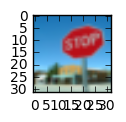

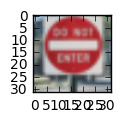

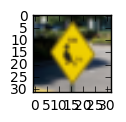

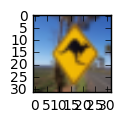

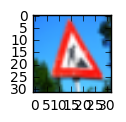

In [23]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

from scipy.misc import imresize

imgs = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']

new_input = []

for imgname in imgs:
    image = mpimg.imread('extra-images/' + imgname)
    image = imresize(image, (32,32))
    new_input.append(image)

for image in new_input:
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

In [24]:
labels = tf.argmax(one_hot_y, 1)
new_input_32 = np.float32(new_input)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    top5 = sess.run(tf.nn.top_k(tf.constant(new_input_32), k=3, sorted=True))
    
    print(top5)


TopKV2(values=array([[[[ 177.,  113.,   25.],
         [ 178.,  113.,   25.],
         [ 178.,  113.,   25.],
         ..., 
         [ 178.,  114.,   26.],
         [ 178.,  114.,   26.],
         [ 177.,  113.,   25.]],

        [[ 179.,  115.,   26.],
         [ 180.,  114.,   27.],
         [ 180.,  115.,   27.],
         ..., 
         [ 180.,  116.,   28.],
         [ 180.,  116.,   28.],
         [ 179.,  115.,   27.]],

        [[ 181.,  118.,   26.],
         [ 181.,  118.,   28.],
         [ 182.,  118.,   29.],
         ..., 
         [ 183.,  119.,   31.],
         [ 183.,  119.,   31.],
         [ 182.,  118.,   30.]],

        ..., 
        [[ 196.,  177.,  176.],
         [ 209.,  191.,  191.],
         [ 213.,  196.,  194.],
         ..., 
         [ 209.,  192.,  191.],
         [ 210.,  193.,  190.],
         [ 208.,  193.,  187.]],

        [[ 203.,  187.,  175.],
         [ 202.,  189.,  175.],
         [ 202.,  189.,  177.],
         ..., 
         [ 214.,  204.,  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.